In [1]:
!pip install flair

     |████████████████████████████████| 143kB 22.3MB/s 
     |████████████████████████████████| 501kB 33.7MB/s 
     |████████████████████████████████| 1.0MB 64.3MB/s 
     |████████████████████████████████| 798kB 57.2MB/s 
     |████████████████████████████████| 235kB 68.5MB/s 
     |████████████████████████████████| 3.7MB 69.2MB/s 
     |████████████████████████████████| 870kB 74.4MB/s 
     |████████████████████████████████| 1.0MB 65.4MB/s 
  Created wheel for segtok: filename=segtok-1.5.7-cp36-none-any.whl size=23258 sha256=e50af5b5a4c7ff984c86921bfc18fee31ef9dd8285ae0fbd4a7f61457784f65a
  Stored in directory: /root/.cache/pip/wheels/15/ee/a8/6112173f1386d33eebedb3f73429cfa41a4c3084556bcee254
  Created wheel for langdetect: filename=langdetect-1.0.7-cp36-none-any.whl size=993459 sha256=2f76a7f73f667965379c47896a307ce6c0eaf6bab3f698ff3c1dd9a582c68c00
  Stored in directory: /root/.cache/pip/wheels/ec/0c/a9/1647275e7ef5014e7b83ff30105180e332867d65e7617ddafe
  Created wheel for mpld3: 

In [0]:
from flair.data import Corpus
from flair.datasets import TREC_6
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

In [4]:
# 1. get the corpus
corpus: Corpus = TREC_6()

2020-02-25 10:18:32,526 https://cogcomp.seas.upenn.edu/Data/QA/QC/train_5500.label not found in cache, downloading to /tmp/tmp2dyke7fc


100%|██████████| 335858/335858 [00:01<00:00, 311561.18B/s]

2020-02-25 10:18:34,711 copying /tmp/tmp2dyke7fc to cache at /root/.flair/datasets/trec_6/original/train_5500.label
2020-02-25 10:18:34,713 removing temp file /tmp/tmp2dyke7fc


2020-02-25 10:18:35,996 https://cogcomp.seas.upenn.edu/Data/QA/QC/TREC_10.label not found in cache, downloading to /tmp/tmpuc6npc25


100%|██████████| 23354/23354 [00:00<00:00, 108016.36B/s]

2020-02-25 10:18:37,313 copying /tmp/tmpuc6npc25 to cache at /root/.flair/datasets/trec_6/original/TREC_10.label
2020-02-25 10:18:37,314 removing temp file /tmp/tmpuc6npc25
2020-02-25 10:18:37,329 Reading data from /root/.flair/datasets/trec_6
2020-02-25 10:18:37,330 Train: /root/.flair/datasets/trec_6/train.txt
2020-02-25 10:18:37,331 Dev: None
2020-02-25 10:18:37,332 Test: /root/.flair/datasets/trec_6/test.txt


In [5]:
# 2. create the label dictionary
label_dict = corpus.make_label_dictionary()

2020-02-25 10:18:42,712 Computing label dictionary. Progress:


100%|██████████| 4907/4907 [00:00<00:00, 216626.32it/s]

2020-02-25 10:18:42,761 [b'LOC', b'DESC', b'ENTY', b'HUM', b'NUM', b'ABBR']


In [6]:
# 3. make a list of word embeddings
word_embeddings = [WordEmbeddings('glove'),

                   # comment in flair embeddings for state-of-the-art results
                    FlairEmbeddings('news-forward'),
                    FlairEmbeddings('news-backward'),
                   ]

2020-02-25 10:19:28,547 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim.vectors.npy not found in cache, downloading to /tmp/tmp3h4lvgt_


100%|██████████| 160000128/160000128 [00:18<00:00, 8852943.99B/s] 

2020-02-25 10:19:47,912 copying /tmp/tmp3h4lvgt_ to cache at /root/.flair/embeddings/glove.gensim.vectors.npy


2020-02-25 10:19:48,131 removing temp file /tmp/tmp3h4lvgt_
2020-02-25 10:19:50,166 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings/glove.gensim not found in cache, downloading to /tmp/tmpq2st4hlm


100%|██████████| 21494764/21494764 [00:04<00:00, 5045432.65B/s]

2020-02-25 10:19:55,710 copying /tmp/tmpq2st4hlm to cache at /root/.flair/embeddings/glove.gensim
2020-02-25 10:19:55,736 removing temp file /tmp/tmpq2st4hlm



/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


2020-02-25 10:19:58,673 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-forward--h2048-l1-d0.05-lr30-0.25-20/news-forward-0.4.1.pt not found in cache, downloading to /tmp/tmp1scjize3


100%|██████████| 73034624/73034624 [00:09<00:00, 7680460.92B/s]

2020-02-25 10:20:09,477 copying /tmp/tmp1scjize3 to cache at /root/.flair/embeddings/news-forward-0.4.1.pt
2020-02-25 10:20:09,557 removing temp file /tmp/tmp1scjize3


2020-02-25 10:20:20,971 https://s3.eu-central-1.amazonaws.com/alan-nlp/resources/embeddings-v0.4.1/big-news-backward--h2048-l1-d0.05-lr30-0.25-20/news-backward-0.4.1.pt not found in cache, downloading to /tmp/tmphn21ozv9


100%|██████████| 73034575/73034575 [00:09<00:00, 7304809.85B/s]

2020-02-25 10:20:32,297 copying /tmp/tmphn21ozv9 to cache at /root/.flair/embeddings/news-backward-0.4.1.pt
2020-02-25 10:20:32,363 removing temp file /tmp/tmphn21ozv9


In [0]:
# 4. initialize document embedding by passing list of word embeddings
# Can choose between many RNN types (GRU by default, to change use rnn_type parameter)
document_embeddings: DocumentRNNEmbeddings = DocumentRNNEmbeddings(word_embeddings,
                                                                     hidden_size=512,
                                                                     reproject_words=True,
                                                                     reproject_words_dimension=256,
                                                                     )

In [0]:
# 5. create the text classifier
classifier = TextClassifier(document_embeddings, label_dictionary=label_dict)

In [0]:
# 6. initialize the text classifier trainer
trainer = ModelTrainer(classifier, corpus)

In [10]:
# 7. start the training
trainer.train('resources/taggers/ag_news',
              learning_rate=0.1,
              mini_batch_size=32,
              anneal_factor=0.5,
              patience=5,
              max_epochs=50)

2020-02-25 10:26:40,118 ----------------------------------------------------------------------------------------------------
2020-02-25 10:26:40,119 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.05, inplace=False)
          (encoder): Embedding(300, 100)
          (rnn): LSTM(100, 2048)
          (decoder): Linear(in_features=2048, out_features=300, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=4196, out_features=256, bias=True)
    (rnn): GRU(256, 512, ba

{'dev_loss_history': [tensor(1.3180, device='cuda:0'),
  tensor(1.1145, device='cuda:0'),
  tensor(1.2744, device='cuda:0'),
  tensor(1.2600, device='cuda:0'),
  tensor(0.6624, device='cuda:0'),
  tensor(0.7098, device='cuda:0'),
  tensor(0.5789, device='cuda:0'),
  tensor(0.7165, device='cuda:0'),
  tensor(0.5083, device='cuda:0'),
  tensor(0.5302, device='cuda:0'),
  tensor(0.5259, device='cuda:0'),
  tensor(0.4135, device='cuda:0'),
  tensor(0.3120, device='cuda:0'),
  tensor(0.4732, device='cuda:0'),
  tensor(0.4289, device='cuda:0'),
  tensor(0.2676, device='cuda:0'),
  tensor(0.2720, device='cuda:0'),
  tensor(0.3266, device='cuda:0'),
  tensor(0.2635, device='cuda:0'),
  tensor(0.4420, device='cuda:0'),
  tensor(0.3497, device='cuda:0'),
  tensor(0.2525, device='cuda:0'),
  tensor(0.2427, device='cuda:0'),
  tensor(0.1983, device='cuda:0'),
  tensor(0.2175, device='cuda:0'),
  tensor(0.2476, device='cuda:0'),
  tensor(0.1841, device='cuda:0'),
  tensor(0.2691, device='cuda:0'),


Weights plots are saved in resources/taggers/ag_news/weights.png


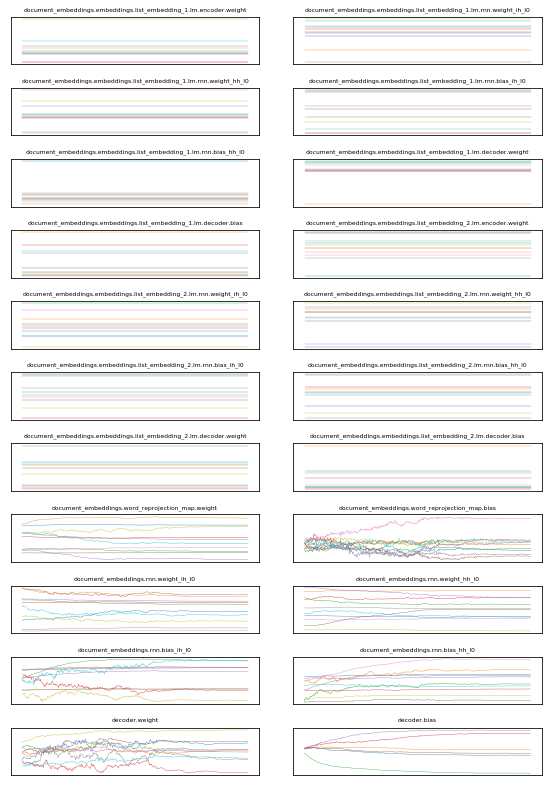

In [11]:
# 8. plot weight traces (optional)
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_weights('resources/taggers/ag_news/weights.txt')

In [13]:
from flair.data import Sentence
classifier = TextClassifier.load('resources/taggers/ag_news/final-model.pt')

# create example sentence
sentence = Sentence('France is the current world cup winner.')

# predict class and print
classifier.predict(sentence)

print(sentence.labels)

2020-02-25 10:34:28,687 loading file resources/taggers/ag_news/final-model.pt
[ENTY (0.6297168731689453)]
